In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('df1_loan.csv')
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            497 non-null    object 
 4   Dependents         488 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      473 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         482 non-null    float64
 10  Loan_Amount_Term   486 non-null    float64
 11  Credit_History     459 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 58.7+ KB


In [4]:
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [5]:
X = X.drop(['Unnamed: 0', 'Loan_ID'], axis=1)

- Credit_History -> 범주형으로
- Total_Income -> numeric으로

In [6]:
X['Credit_History'] = X['Credit_History'].astype('category')

In [7]:
X['Credit_History'].dtypes

CategoricalDtype(categories=[0.0, 1.0], ordered=False)

In [8]:
X['Total_Income'] = X['Total_Income'].apply( lambda x: float(x[1:]) )
X['Total_Income']

0       5849.0
1       6091.0
2       3000.0
3       4941.0
4       6000.0
        ...   
495     4239.0
496     4300.0
497     7482.0
498     2895.0
499    10699.0
Name: Total_Income, Length: 500, dtype: float64

In [9]:
num_col = list(X._get_numeric_data().columns)
num_col 

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Total_Income']

In [10]:
cat_col = list( set(X.columns) - set(num_col) )
cat_col

['Self_Employed',
 'Dependents',
 'Gender',
 'Property_Area',
 'Education',
 'Married',
 'Credit_History']

In [11]:
for num_feature in num_col:
    X[num_feature] = X[num_feature].fillna(X[num_feature].mean())

In [12]:
for cat_feature in cat_col:
    X[cat_feature] = X[cat_feature].fillna( X[cat_feature].mode()[0] )

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             500 non-null    object  
 1   Married            500 non-null    object  
 2   Dependents         500 non-null    object  
 3   Education          500 non-null    object  
 4   Self_Employed      500 non-null    object  
 5   ApplicantIncome    500 non-null    int64   
 6   CoapplicantIncome  500 non-null    float64 
 7   LoanAmount         500 non-null    float64 
 8   Loan_Amount_Term   500 non-null    float64 
 9   Credit_History     500 non-null    category
 10  Property_Area      500 non-null    object  
 11  Total_Income       500 non-null    float64 
dtypes: category(1), float64(4), int64(1), object(6)
memory usage: 43.7+ KB


Text(0, 0.5, '')

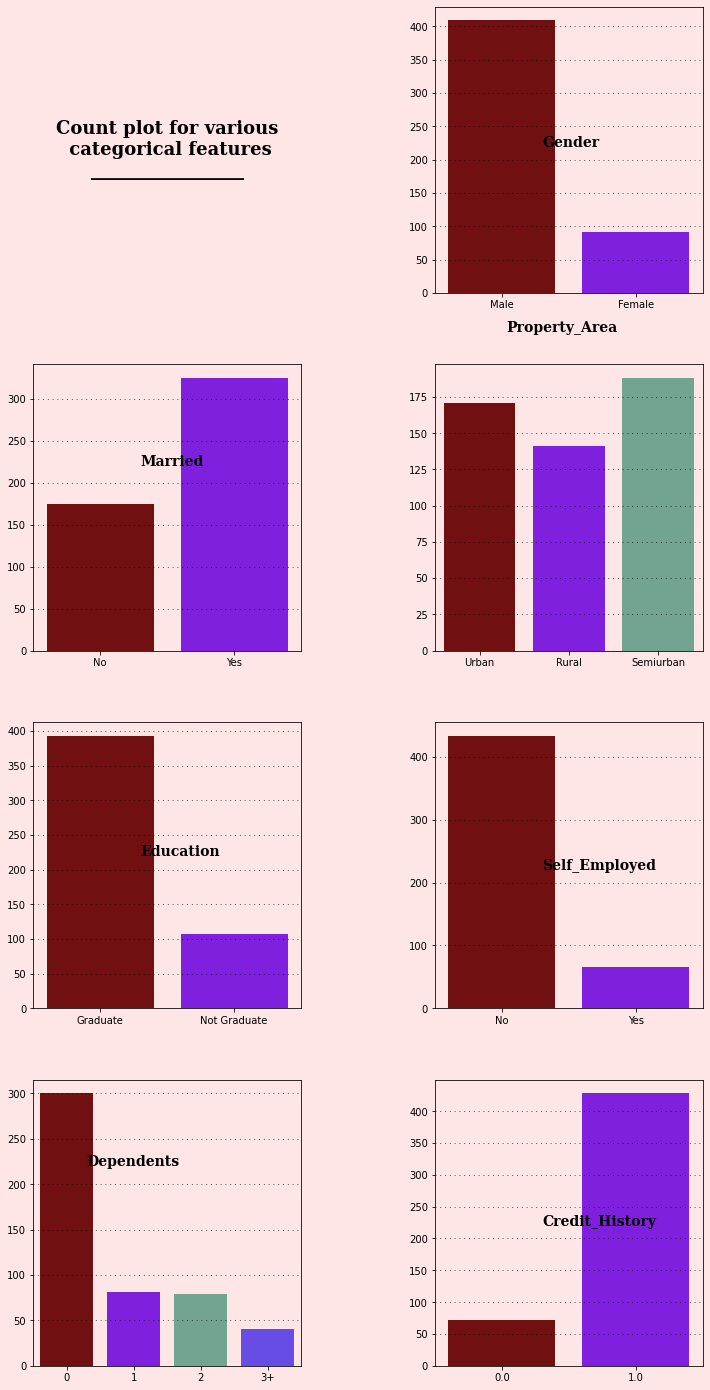

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12, 25))
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 0])
ax7 = fig.add_subplot(gs[3, 1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# 'Gender'
ax1.text(0.3, 220, 'Gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=X,x='Gender',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# 'Married'
ax2.text(0.3, 220, 'Married', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=X,x='Married',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# 'Property_Area'
ax3.text(0.3, 220, 'Property_Area', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=X,x='Property_Area',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# 'Education'
ax4.text(0.3, 220, 'Education', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=X,x='Education',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# 'Self_Employed'
ax5.text(0.3, 220, 'Self_Employed', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=X,x='Self_Employed',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# 'Dependents'
ax6.text(0.3, 220, 'Dependents', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=X,x='Dependents',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# 'Credit_History'
ax7.text(0.3, 220, 'Credit_History', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=X,x='Credit_History',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")


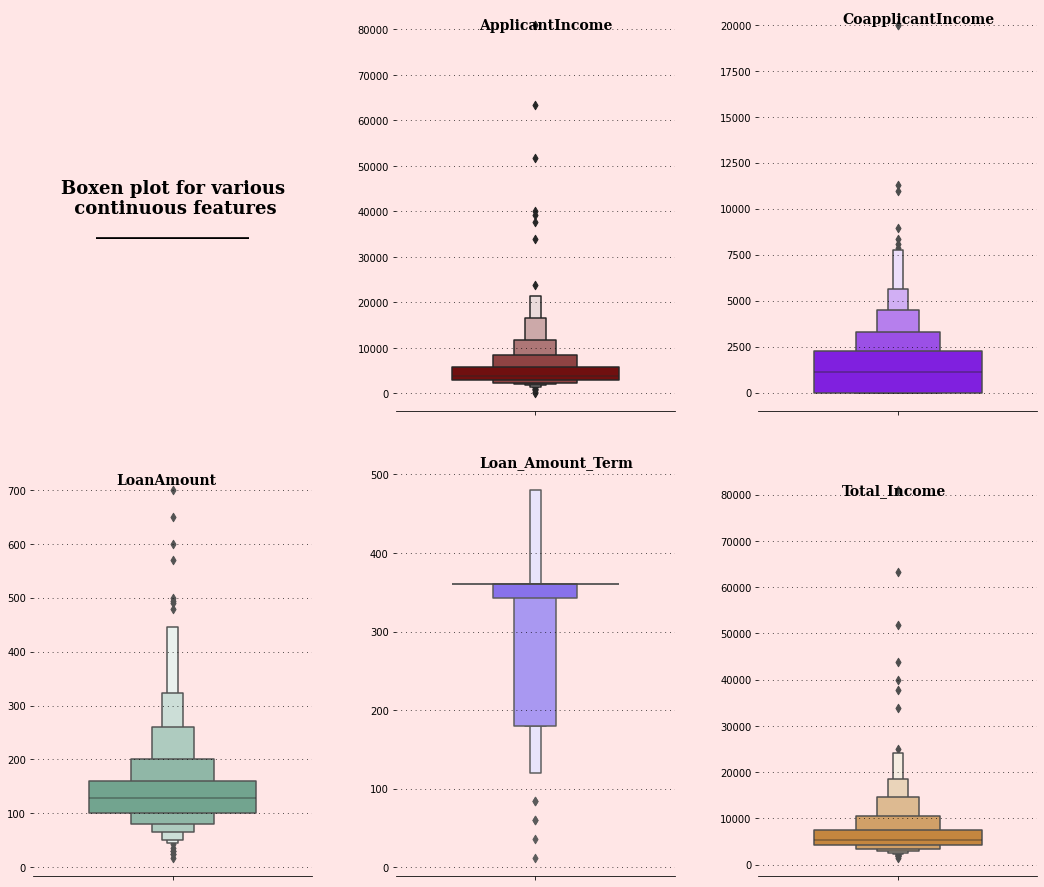

In [15]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# 'ApplicantIncome'
ax1.text(-0.2, 80100, 'ApplicantIncome', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=X['ApplicantIncome'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# 'CoapplicantIncome'
ax2.text(-0.2, 20100, 'CoapplicantIncome', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=X['CoapplicantIncome'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# 'LoanAmount'
ax3.text(-0.2, 710, 'LoanAmount', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=X['LoanAmount'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# 'Loan_Amount_Term'
ax4.text(-0.2, 510, 'Loan_Amount_Term', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=X['Loan_Amount_Term'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# 'Total_Income'
ax5.text(-0.2, 80100, 'Total_Income', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=X['Total_Income'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

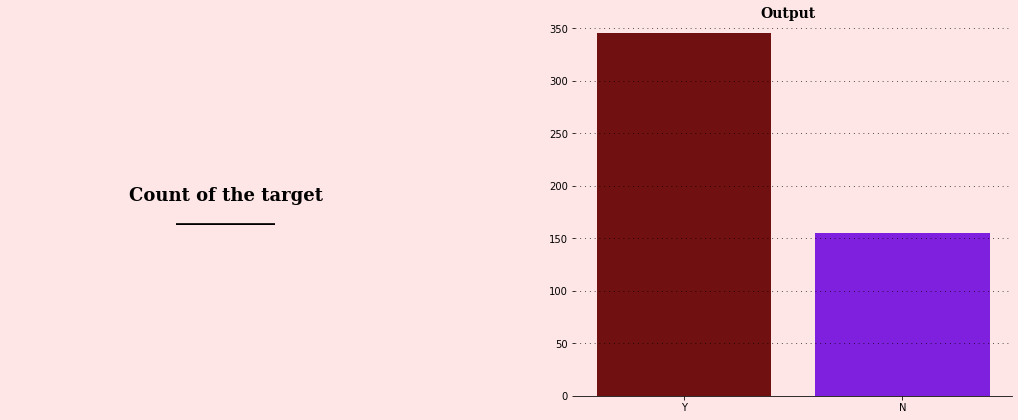

In [16]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,360,"Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'Loan_Status',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")


ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)


In [17]:
X_corr = X[num_col].corr().transpose()
X_corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Income
ApplicantIncome,1.000000,-0.121292,0.577733,-0.068974,0.947170
CoapplicantIncome,-0.121292,1.000000,0.204491,0.006509,0.203479
LoanAmount,0.577733,0.204491,1.000000,0.030285,0.635928
Loan_Amount_Term,-0.068974,0.006509,0.030285,1.000000,-0.065930
Total_Income,0.947170,0.203479,0.635928,-0.065930,1.000000


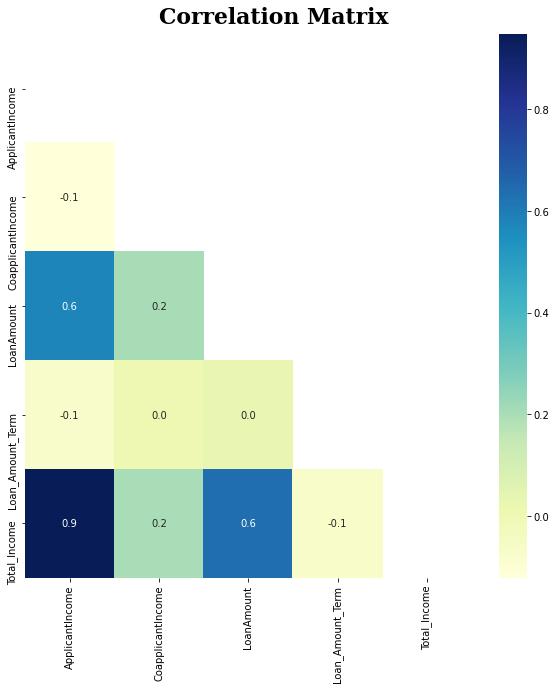

In [18]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(X_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
X_corr = X[num_col].corr().transpose()
sns.heatmap(X_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

In [19]:
target = pd.DataFrame(df['Loan_Status'])
df = pd.concat([X, target], axis=1)
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Status
495,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,4239.0,Y
496,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,4300.0,Y
497,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,1.0,Urban,7482.0,Y
498,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,2895.0,Y
499,Male,No,0,Graduate,No,6283,4416.0,209.0,360.0,0.0,Rural,10699.0,N


Text(0, 0.5, '')

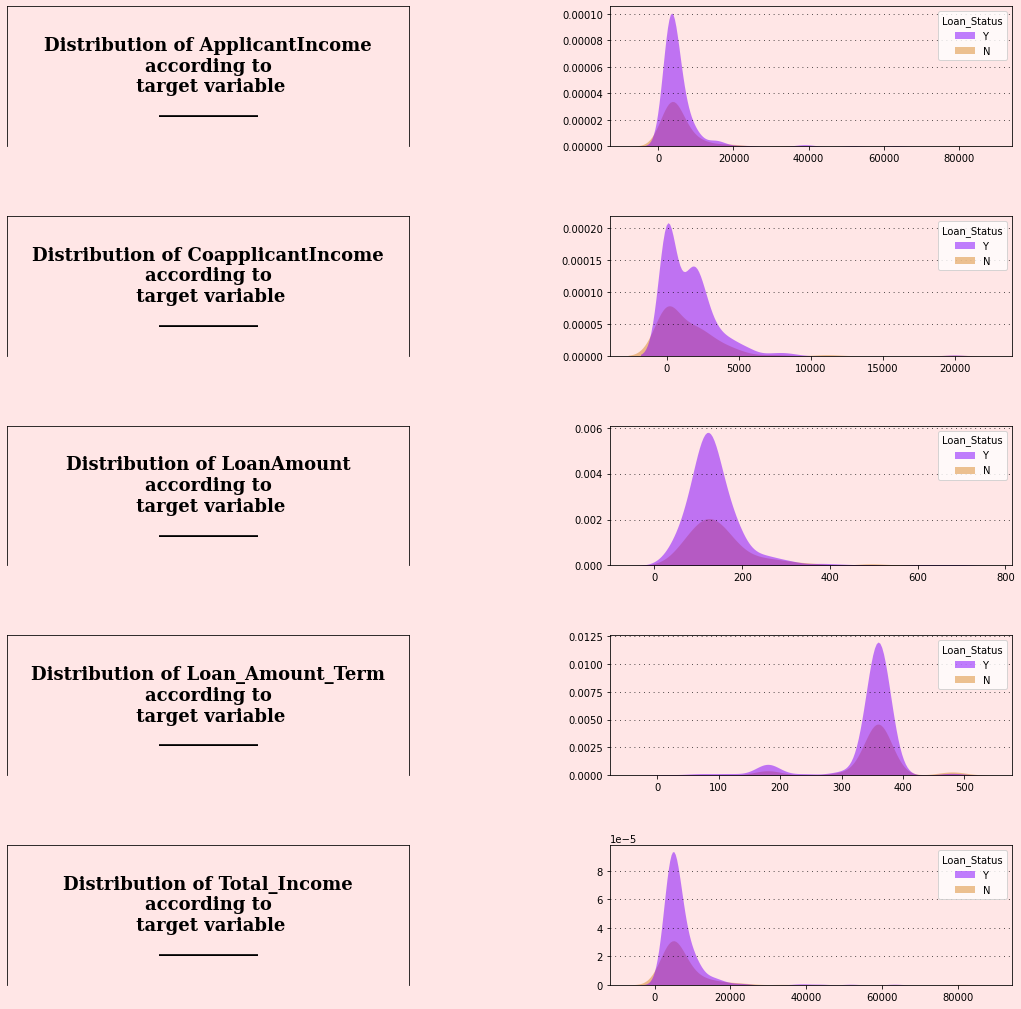

In [20]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# 'ApplicantIncome'
ax0.text(0.5,0.5,"Distribution of ApplicantIncome\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='ApplicantIncome',hue="Loan_Status", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# 'CoapplicantIncome'
ax2.text(0.5,0.5,"Distribution of CoapplicantIncome\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='CoapplicantIncome',hue="Loan_Status", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# 'LoanAmount'
ax4.text(0.5,0.5,"Distribution of LoanAmount\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='LoanAmount',hue="Loan_Status", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# 'Loan_Amount_Term'
ax6.text(0.5,0.5,"Distribution of Loan_Amount_Term\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='Loan_Amount_Term',hue="Loan_Status", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# 'Total_Income'
ax8.text(0.5,0.5,"Distribution of Total_Income\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='Total_Income',hue="Loan_Status", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

In [21]:
X_OneHot = pd.get_dummies(X, prefix=cat_col)
X_OneHot.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Income,Self_Employed_Female,Self_Employed_Male,Dependents_No,Dependents_Yes,Gender_0,...,Gender_3+,Property_Area_Graduate,Property_Area_Not Graduate,Education_No,Education_Yes,Married_0.0,Married_1.0,Credit_History_Rural,Credit_History_Semiurban,Credit_History_Urban
0,5849,0.0,144.020747,360.0,5849.0,0,1,1,0,1,...,0,1,0,1,0,0,1,0,0,1
1,4583,1508.0,128.000000,360.0,6091.0,0,1,0,1,0,...,0,1,0,1,0,0,1,1,0,0
2,3000,0.0,66.000000,360.0,3000.0,0,1,0,1,1,...,0,1,0,0,1,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,4941.0,0,1,0,1,1,...,0,0,1,1,0,0,1,0,0,1
4,6000,0.0,141.000000,360.0,6000.0,0,1,1,0,1,...,0,1,0,1,0,0,1,0,0,1


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num = X_OneHot.loc[:, num_col]
X_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Income
0,5849,0.0,144.020747,360.0,5849.0
1,4583,1508.0,128.000000,360.0,6091.0
2,3000,0.0,66.000000,360.0,3000.0
3,2583,2358.0,120.000000,360.0,4941.0
4,6000,0.0,141.000000,360.0,6000.0


In [23]:
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, columns=X_num.columns)
X_scaled.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Income
0,0.054593,-0.706425,-3.519053e-16,0.277664,-0.174409
1,-0.139902,0.000794,-1.983620e-01,0.277664,-0.137738
2,-0.383098,-0.706425,-9.660192e-01,0.277664,-0.606131
3,-0.447162,0.399425,-2.974145e-01,0.277664,-0.312003
4,0.077791,-0.706425,-3.740158e-02,0.277664,-0.151527


In [24]:
for num_feature in num_col:
    X_OneHot[num_feature] = X_scaled[num_feature]
X_OneHot.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Income,Self_Employed_Female,Self_Employed_Male,Dependents_No,Dependents_Yes,Gender_0,...,Gender_3+,Property_Area_Graduate,Property_Area_Not Graduate,Education_No,Education_Yes,Married_0.0,Married_1.0,Credit_History_Rural,Credit_History_Semiurban,Credit_History_Urban
0,0.054593,-0.706425,-3.519053e-16,0.277664,-0.174409,0,1,1,0,1,...,0,1,0,1,0,0,1,0,0,1
1,-0.139902,0.000794,-1.983620e-01,0.277664,-0.137738,0,1,0,1,0,...,0,1,0,1,0,0,1,1,0,0
2,-0.383098,-0.706425,-9.660192e-01,0.277664,-0.606131,0,1,0,1,1,...,0,1,0,0,1,0,1,0,0,1
3,-0.447162,0.399425,-2.974145e-01,0.277664,-0.312003,0,1,0,1,1,...,0,0,1,1,0,0,1,0,0,1
4,0.077791,-0.706425,-3.740158e-02,0.277664,-0.151527,0,1,1,0,1,...,0,1,0,1,0,0,1,0,0,1


In [25]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_OneHot, y, test_size=0.25)

In [26]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
preds_logistic = logistic.predict(X_test)

In [27]:
print('Logistic Regression Accuracy Score: {:0.3f}'.format(accuracy_score(y_test, preds_logistic)))

Logistic Regression Accuracy Score: 0.824


In [28]:
from sklearn.tree import DecisionTreeClassifier

decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
preds_decision = decision.predict(X_test)

In [29]:
print('Decision Tree clf Accuracy Score: {:0.3f}'.format(accuracy_score(y_test, preds_decision)))

Decision Tree clf Accuracy Score: 0.728


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gradientBoosting = GradientBoostingClassifier()
gradientBoosting.fit(X_train, y_train)
preds_boosting = gradientBoosting.predict(X_test)

In [31]:
print('Boosting Accuracy Score: {:0.3f}'.format(accuracy_score(y_test, preds_boosting)))

Boosting Accuracy Score: 0.752


In [32]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb.fit(X_train, y_train)
preds_xgb = xgb.predict(X_test)

[13:45:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\timo\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [33]:
print('xgb Score: {:0.3f}'.format(accuracy_score(y_test, preds_xgb)))

xgb Score: 0.776


In [34]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(X_train, y_train)
preds_cat = cat.predict(X_test)

Learning rate set to 0.006777
0:	learn: 0.6895487	total: 155ms	remaining: 2m 34s
1:	learn: 0.6865140	total: 157ms	remaining: 1m 18s
2:	learn: 0.6831421	total: 161ms	remaining: 53.6s
3:	learn: 0.6798176	total: 170ms	remaining: 42.4s
4:	learn: 0.6764315	total: 174ms	remaining: 34.6s
5:	learn: 0.6729657	total: 176ms	remaining: 29.2s
6:	learn: 0.6697782	total: 178ms	remaining: 25.2s
7:	learn: 0.6666553	total: 180ms	remaining: 22.3s
8:	learn: 0.6635684	total: 183ms	remaining: 20.1s
9:	learn: 0.6601542	total: 185ms	remaining: 18.3s
10:	learn: 0.6569946	total: 187ms	remaining: 16.8s
11:	learn: 0.6540133	total: 189ms	remaining: 15.5s
12:	learn: 0.6506788	total: 191ms	remaining: 14.5s
13:	learn: 0.6476196	total: 193ms	remaining: 13.6s
14:	learn: 0.6445930	total: 196ms	remaining: 12.9s
15:	learn: 0.6413818	total: 198ms	remaining: 12.2s
16:	learn: 0.6389023	total: 201ms	remaining: 11.6s
17:	learn: 0.6360761	total: 203ms	remaining: 11.1s
18:	learn: 0.6327096	total: 205ms	remaining: 10.6s
19:	learn

In [35]:
print('catBoost Score: {:0.3f}'.format(accuracy_score(y_test, preds_cat)))

catBoost Score: 0.840
